<div class="alert alert-info"; style="border-left: 5px solid blue">
<b>Goal</b> The objective is to analyze key metrics within the "Instacart" app, focusing on identifying the most popular items, their sequence in customers' carts, peak usage times and days, and the frequently reordered items. The ultimate goal is to present this data in a clear and comprehensible format, providing insights to enhance the overall efficiency of Instacart operations.

Key Steps:

Format Data for Python: Organize the data in a format suitable for Python analysis, ensuring readability and compatibility.

Address Data Quality: Identify and handle duplicate and missing values in the dataset. Implement appropriate measures, such as filling in missing values or removing redundant entries, to enhance data accuracy.

Analyze and Extract Insights: Utilize Python to analyze the dataset, extracting essential information related to popular items, cart sequences, peak usage times, and frequently reordered products.

Visualization: Create visually appealing and informative graphs to represent crucial data points, facilitating a better understanding of trends and patterns.

Communicate Findings: Compile a comprehensive report or presentation that effectively communicates the identified insights and recommendations for optimizing Instacart's operational efficiency.

By following these steps, the goal is to empower decision-makers at Instacart with actionable insights, contributing to a more streamlined and effective management of the platform.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Well done

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import plotly.express as px

In [4]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
orders.info()
print(orders.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

In [5]:
products = pd.read_csv('/datasets/products.csv', sep=';')
products.info()
print()
print(products.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [6]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')
departments.info()
print()
print(departments.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [7]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
aisles.info()
print()
print(aisles.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [8]:
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
order_products.info()
print()
print(order_products.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [9]:
# Check for duplicated orders
print(orders.duplicated().sum()) #calculates number of duplicate rows

15


In [10]:
# Check for all orders placed Wednesday at 2:00 AM # Assuming 0 = Sunday and 6 = Saturday

print(((orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)).sum()) # 

121


In [11]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [12]:
# Double check for duplicate rows
print(orders.duplicated().sum())

0


In [13]:
# Double check for duplicate order IDs only
print(orders["order_id"].duplicated().sum())

0


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Duplicate checking is the basis of data preprocessing

### `products` data frame

In [14]:
# Check for fully duplicate rows
print(products.duplicated().sum())

0


In [15]:
# Check for just duplicate product IDs
print(products['product_id'].duplicated().sum())

0


In [16]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
print(products['product_name'].duplicated(keep='first').sum())

1361


In [17]:
# Check for duplicate product names that aren't missing
print((~(products['product_name'].isna())).duplicated().sum())

49692


### `departments` data frame

In [18]:
print(departments.duplicated().sum())

0


In [19]:
print(departments['department'].duplicated().sum())
print(departments['department_id'].duplicated().sum())

0
0


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right, well done!)

### `aisles` data frame

In [20]:
print(aisles.duplicated().sum())

0


In [21]:
print(aisles['aisle'].duplicated().sum())
print(aisles['aisle_id'].duplicated().sum())

0
0


<div class="alert alert-info"> <b>Student сomments:</b> The remaining duplicates in the data pertain to product names. This is expected, given that multiple units of a product may be sold, resulting in identical product names. It's worth noting that duplicates within orders have been successfully removed, as they were limited in occurrence.</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

All right

### `order_products` data frame

In [22]:
# Check for fully duplicate rows
print(order_products.duplicated().sum())

0


In [23]:
# Double check for any other tricky duplicates # Only order_id doesn't make sense having that many duplicates   ?
print(order_products['order_id'].duplicated().sum())
print(order_products['product_id'].duplicated().sum())
print(order_products['add_to_cart_order'].duplicated().sum()) 
print(order_products['reordered'].duplicated().sum())

duplicate_rows = order_products[order_products.duplicated(['order_id', 'product_id'], keep=False)]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

4094961
4499434
4544942
4545005
No duplicate rows found.


## Find and remove missing values


### `products` data frame

In [24]:
display(products)

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [25]:
# Are all of the missing product names associated with aisle ID 100?  #Not all but most
missing_product_names = products.loc[(products['aisle_id'] == 100) & (products['product_name'].isnull()), 'product_name']
print(missing_product_names.isnull().sum()) 
print()
print(missing_product_names)

1258

37       NaN
71       NaN
109      NaN
296      NaN
416      NaN
        ... 
49552    NaN
49574    NaN
49640    NaN
49663    NaN
49668    NaN
Name: product_name, Length: 1258, dtype: object


In [26]:
# Are all of the missing product names associated with department ID 21? # Same amount as the missing values in aisle 100
missing_product_names = products.loc[(products['department_id'] == 21) & (products['product_name'].isnull())]
print(missing_product_names.isnull().sum())
print()
print(missing_product_names)

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [27]:
# What is this ailse and department?
filtered_data = products[(products['aisle_id'] == 100) & (products['department_id'] == 21)]
print(filtered_data.head(10))

     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21
436         437          NaN       100             21
439         440          NaN       100             21
471         472          NaN       100             21
490         491          NaN       100             21
555         556          NaN       100             21


In [28]:
filtered_data = products[(products['aisle_id'] == 100) & (products['department_id'] != 21)]
print(filtered_data.head(10))

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


<div class="alert alert-info"> <b>Student сomments:</b> Can you explain why? When I set it != 21, it returns an empty dataframe on both. I'm trying to find aisle 21 and department 100 right?

In [29]:
# Fill missing product names with 'Unknown' #👍 
products['product_name'] = products['product_name'].fillna('Unknown')
filtered_data = products[(products['aisle_id'] == 100) & (products['department_id'] != 21)]
print(filtered_data.head(10))

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


### `orders` data frame

In [30]:
print(orders.head(10))

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   
5   1843871    20084             5          0                 11   
6   2511640   148233            40          3                  8   
7   2521283    97711             2          0                 18   
8   2266494    34954            40          5                 15   
9    446014    15356             2          4                  8   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
5                    15.0  
6                     2.0  
7                    22.0  

In [31]:
# Are there any missing values where it's not a customer's first order? #No
missing_order_numbers = orders.loc[(orders['order_number'] > 1) & (orders['order_number'].isnull()), 'order_number']
print(missing_order_numbers)

Series([], Name: order_number, dtype: int64)


### `order_products` data frame

In [32]:
print(order_products.head(10))

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
5   2456893       21616                4.0          1
6    644579       12341                5.0          1
7   2231852       44925               10.0          1
8   3185766       36259               14.0          1
9    420019       23315                4.0          1


In [33]:
# What are the min and max values in this column?
print(order_products.min())
print()
print(order_products.max())

order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64

order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64


In [34]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_values_op = order_products['add_to_cart_order'].isnull()
orders_missing = order_products.loc[missing_values_op, 'order_id'].unique()
print(orders_missing)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [35]:
# Do all orders with missing values have more than 64 products?
orders_missing = order_products.loc[missing_values_op]
over64 = all(orders_missing.groupby('order_id')['product_id'].count() > 64)
print(over64)

False


In [36]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)
print(order_products['add_to_cart_order'].head(10))

0    17
1     1
2     1
3    35
4     5
5     4
6     5
7    10
8    14
9     4
Name: add_to_cart_order, dtype: int64


<div class="alert alert-info"> <b>Student сomments:</b> I just followed the provided instructions. Thanks for the help

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__
    
^^    

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [37]:
print(sorted(orders['order_hour_of_day'].unique())) #used sorted to make easier to read

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [38]:
print(sorted(orders['order_dow'].unique()))

[0, 1, 2, 3, 4, 5, 6]


<div class="alert alert-info"; style="border-left: 5px solid blue">
<b>Sidenote</b> I know it didn't tell me to plot these next few questions, I just thought it would be easier to read the data

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

All right

### [A2] What time of day do people shop for groceries?

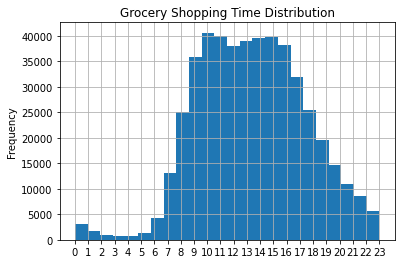

In [39]:
# Not sure why xlabel and ylabel aren't working
# The most common time for people to grocery shop is between 9am to 5pm and the most common hour is 10am to 11am
# Also not really sure this is showing correctly because it seems like there is 1 or 2 missing hours or there just aren't any orders at that time
orders['order_hour_of_day'].plot(
    title='Grocery Shopping Time Distribution', 
    kind='hist', 
    bins=24, 
    xlabel='Hour of Day (0 to 23)', 
    ylabel='Number of Orders',
    xticks=(range(24)),
    grid=True
    )
plt.show()

### [A3] What day of the week do people shop for groceries?

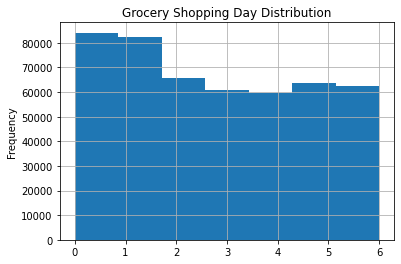

In [40]:
# Most common days for grocery shopping is Sunday and Monday (assuming 0 is Sunday and 1 is Monday)
orders['order_dow'].plot(
    title='Grocery Shopping Day Distribution', 
    kind='hist', 
    bins=7, 
    xlabel='Day of the Week (0 to 6)', 
    ylabel='Number of Orders',
    grid=True,
    xticks=(range(7))
    )
plt.show()

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You're right to sign the charts

### [A4] How long do people wait until placing another order?

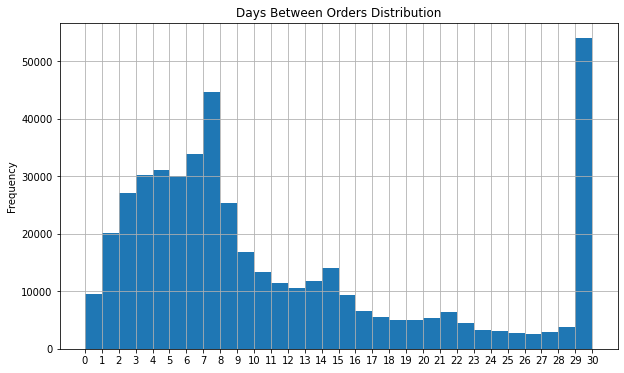

In [41]:
# Most people wait 30 days or more before making another order but 7 days is in close second place
orders['days_since_prior_order'].plot(
    title='Days Between Orders Distribution', 
    kind='hist', 
    bins=30,
    grid=True,
    xticks=(range(31)),
    figsize=(10,6)
    )
plt.show()

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

The 0 values probably correspond to customers who placed more than one order on the same day.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [42]:
wed_orders = orders[orders['order_dow'] == 3]

In [43]:
sat_orders = orders[orders['order_dow'] == 6]

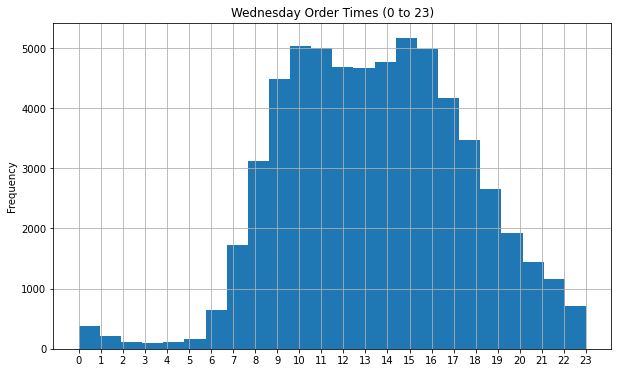

In [44]:
wed_orders['order_hour_of_day'].plot(
    title='Wednesday Order Times (0 to 23)', 
    kind='hist', 
    bins=24,
    grid=True,
    xticks=(range(24)),
    figsize=(10,6)
    )
plt.show()

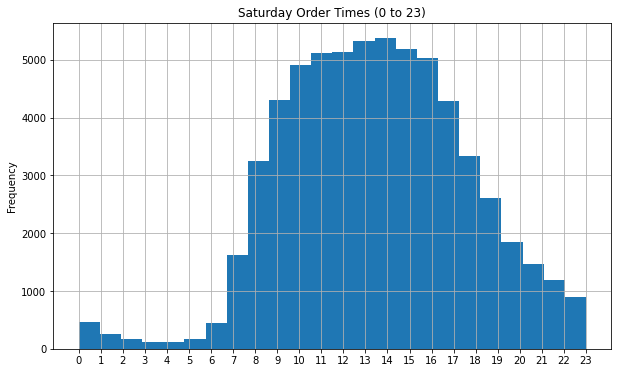

In [45]:
sat_orders['order_hour_of_day'].plot(
    title='Saturday Order Times (0 to 23)', 
    kind='hist', 
    bins=24,
    grid=True,
    xticks=(range(24)),
    figsize=(10,6)
    )
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Answer</b> Saturday has a more normal distribution while Wednesday has two peaks on either side of Saturday's peak. Both kind of skewed to the left 

### [B2] What's the distribution for the number of orders per customer?

In [46]:
orders_per_customer = orders.groupby('user_id')['order_id'].nunique()

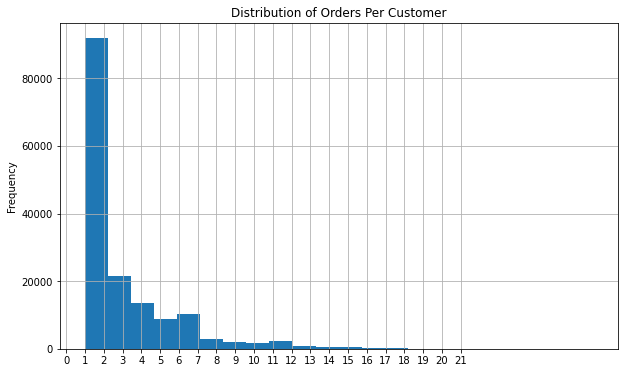

In [47]:
orders_per_customer.plot(
    title='Distribution of Orders Per Customer', 
    kind='hist', 
    bins=22,
    grid=True,
    xticks=(range(22)),
    figsize=(10,6)
    )
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Answer</b> Vast majority of customers only order once. Heavily skewed to the right

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You're right to sign the charts

### [B3] What are the top 20 popular products (display their id and name)?

In [48]:
product_counts = order_products['product_id'].value_counts().reset_index()

# Count the number of each product ordered
product_counts.columns = ['product_id', 'order_count']

# Merge to get product names
top_products = pd.merge(product_counts.head(20), products[['product_id', 'product_name']], on='product_id')

print(top_products[['product_id', 'product_name']])

    product_id              product_name
0        24852                    banana
1        13176    bag of organic bananas
2        21137      organic strawberries
3        21903      organic baby spinach
4        47209      organic hass avocado
5        47766           organic avocado
6        47626               large lemon
7        16797              strawberries
8        26209                     limes
9        27845        organic whole milk
10       27966       organic raspberries
11       22935      organic yellow onion
12       24964            organic garlic
13       45007          organic zucchini
14       39275       organic blueberries
15       49683            cucumber kirby
16       28204        organic fuji apple
17        5876             organic lemon
18        8277  apple honeycrisp organic
19       40706    organic grape tomatoes


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Conclusion</b> The most popular items are fruits, vegetables, and milk. Most of the fruits and vegetables tend to be organic aswell

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [49]:
reorder_rates = order_products.groupby('product_id')['reordered'].mean().reset_index()
reorder_rates.columns = ['product_id', 'reorder_rate']

# Merge s
top_reorder_products = pd.merge(reorder_rates.sort_values(by='reorder_rate', ascending=False).head(20), 
                                products[['product_id', 'product_name']], 
                                on='product_id')

print(top_reorder_products[['product_id', 'product_name']])

    product_id                                       product_name
0        14721                            bone strength take care
1        20949                           vanilla sandwich cookies
2         6723                                   palmiers- petite
3         6732                  naturally sparkling mineral water
4        45088  california dill pollen & garlic goat cheese & ...
5        45078                                       pomegranatea
6        21016       parchment lined 8 in x 3.75 in x 2.5 in pans
7        21005                        peanut butter pie ice cream
8        35192                         chocolate soy milk singles
9        35197  mocha chocolate chip  organic non-dairy frozen...
10        6810                        raspberry goji paleo prints
11       45040                                 head lock mega gel
12       45035                               coffee flavor yogurt
13       27373                                     meat loaf meal
14       3

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Conclusion</b> The items that are reordered most frequently tend to be snack foods, cooking ingredients and items, and some miscellaneous items

### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

In [50]:
first_added_products = order_products[order_products['add_to_cart_order'] == 1]

# Count the occurrences of each product
first_added_product_counts = first_added_products['product_id'].value_counts().reset_index()
first_added_product_counts.columns = ['product_id', 'first_added_count']

# Merge
top_first_added_products = pd.merge(first_added_product_counts.head(20), 
                                    products[['product_id', 'product_name']], 
                                    on='product_id')

print(top_first_added_products[['product_id', 'product_name']])

    product_id                 product_name
0        24852                       banana
1        13176       bag of organic bananas
2        27845           organic whole milk
3        21137         organic strawberries
4        47209         organic hass avocado
5        21903         organic baby spinach
6        47766              organic avocado
7        19660                 spring water
8        16797                 strawberries
9        27966          organic raspberries
10       44632   sparkling water grapefruit
11       49235          organic half & half
12       47626                  large lemon
13         196                         soda
14       38689     organic reduced fat milk
15       26209                        limes
16       12341                hass avocados
17        5785  organic reduced fat 2% milk
18       27086                  half & half
19       22935         organic yellow onion


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Conclusion</b> The items that are put into people's carts first tend to be fruits, vegetables, and dairy products

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Overall Conclusion</b> 
    The most common time for customers to shop using the app is 9am to 5pm, with a peak at 10am to 11am.
    The most common days the app is used is Sunday and Monday.
    Most customers only use the app one time.
    Most customers wait at least 30 days before using the app again.
    The most popular items aswell as the items first into customers' carts are fruits, vegetables, and dairy products.
    Finally, the most popular items reordered are snack foods and cooking essentials

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


It's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊